# NaN Boxing Benchmarks

In [1]:
# Librairies
%pip install -q matplotlib numpy pandas scikit-learn
import numpy as np
import re
import subprocess
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
INTERPRETER = "./target/release/som-interpreter-bc"
LIBS = "core-lib/Smalltalk core-lib/Examples/Benchmarks core-lib/Examples/Benchmarks/LanguageFeatures core-lib/Examples/Benchmarks/TestSuite core-lib/Examples/Benchmarks/ValBenchmark"

def exec_bench(name, runs=10):
    runtimes = []
    allocations = []

    for i in range(runs):
        cmd = f"{INTERPRETER} -c {LIBS} . -- BenchmarkHarness {name} 1"
        
        result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
        output = result.stdout

        runtime = re.search(r"runtime: (\d+)us", output)
        allocated = re.search(r"Allocated:    (\d+)bytes", output)
        if runtime:
            runtimes.append(int(runtime.group(1)))
        if allocated:
            allocations.append(int(allocated.group(1)))

        else:
            print("Runtime not found in output:")
            print(output)
    
    return (runtimes, allocations)


In [3]:
def plot_results(name, runtimes, allocations):
    import matplotlib.pyplot as plt

    iterations = list(range(1, len(runtimes) + 1))
    avg_runtime = sum(runtimes) / len(runtimes)
    avg_alloc = sum(allocations) / len(allocations)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

    # Runtime plot (top)
    ax1.plot(iterations, runtimes, marker='o', linestyle='-', color='blue', label='Runtime (μs)')
    ax1.axhline(avg_runtime, color='blue', linestyle='--', label=f'Avg Runtime: {avg_runtime:.1f}μs')
    ax1.set_ylabel('Runtime (μs)')
    ax1.set_title(f'Benchmark: {name}')
    ax1.legend()
    ax1.grid(True)

    # Allocation plot (bottom)
    ax2.bar(iterations, allocations, color='orange', alpha=0.6, label='Allocation (bytes)')
    ax2.axhline(avg_alloc, color='orange', linestyle='--', label=f'Avg Alloc: {avg_alloc:.0f} bytes')
    ax2.set_ylabel('Allocation (bytes)')
    ax2.set_xlabel('Iteration')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()


Benchmark: DoubleBench, Runs: 100, Runtimes: [12, 6, 6, 5, 5, 4, 4, 3, 5, 4, 4, 5, 5, 5, 5, 3, 4, 4, 3, 4, 4, 3, 3, 6, 5, 3, 3, 3, 3, 5, 4, 5, 3, 3, 4, 6, 3, 6, 5, 5, 5, 3, 3, 6, 6, 4, 5, 5, 5, 4, 4, 6, 3, 6, 2, 3, 3, 6, 3, 5, 3, 3, 6, 4, 5, 5, 5, 4, 3, 3, 6, 3, 3, 5, 3, 6, 3, 6, 5, 3, 6, 3, 6, 5, 3, 3, 3, 4, 3, 3, 3, 4, 6, 3, 5, 4, 4, 4, 3, 7], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


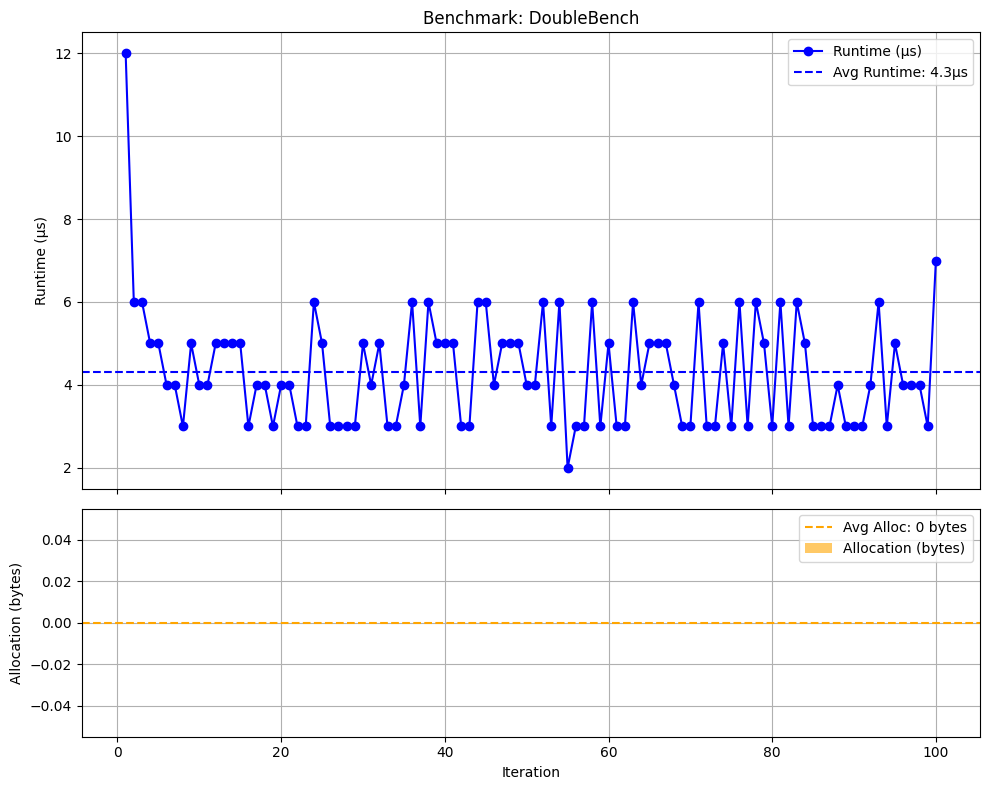

Benchmark: DoubleMedBench, Runs: 100, Runtimes: [8, 8, 10, 10, 10, 7, 8, 8, 10, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 12, 8, 8, 10, 10, 7, 7, 10, 9, 6, 6, 9, 10, 7, 10, 7, 7, 10, 7, 7, 7, 11, 7, 8, 6, 7, 10, 7, 6, 7, 7, 7, 7, 7, 7, 11, 7, 7, 7, 6, 6, 7, 14, 7, 7, 7, 6, 7, 10, 7, 7, 7, 6, 7, 7, 10, 6, 9, 7, 11, 7, 7, 7, 7, 7, 7, 6, 6, 7, 7, 7, 10, 7, 7, 7, 11, 8, 6, 7], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


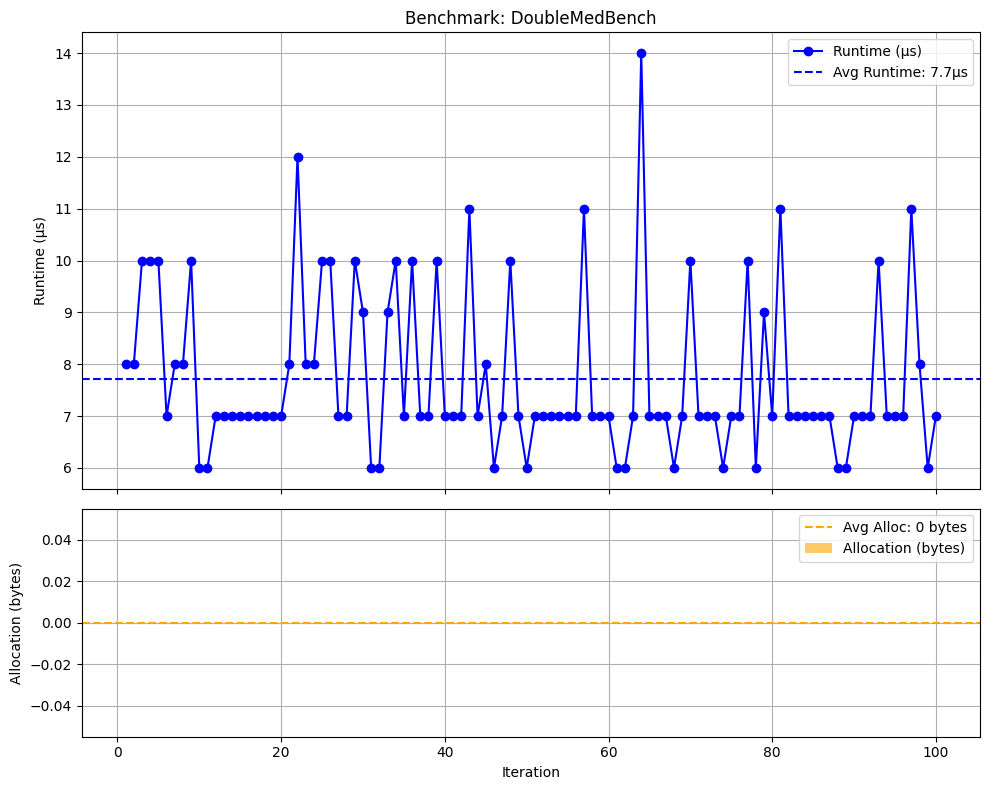

Benchmark: DoubleHighBench, Runs: 100, Runtimes: [29007, 10359, 10210, 10243, 10294, 10300, 10233, 10381, 10331, 10258, 10452, 10351, 10299, 10319, 10397, 10220, 10315, 10415, 10309, 10203, 10319, 10321, 10359, 10204, 10375, 10220, 10262, 10345, 10308, 10285, 10366, 10430, 10313, 10280, 10261, 10343, 10305, 10396, 10399, 10338, 10413, 10395, 10391, 10494, 10284, 10357, 10260, 10319, 10421, 10376, 10299, 10546, 10523, 10475, 10469, 10418, 10527, 10613, 10498, 10375, 10423, 10269, 10239, 10597, 10787, 10645, 10483, 10449, 10433, 10210, 10302, 10495, 10424, 10606, 10539, 10648, 10545, 10624, 10442, 10395, 10529, 10442, 10414, 10337, 10426, 10393, 10375, 10430, 10528, 10275, 10389, 10414, 10313, 10498, 10599, 10543, 10600, 10692, 10596, 10539], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

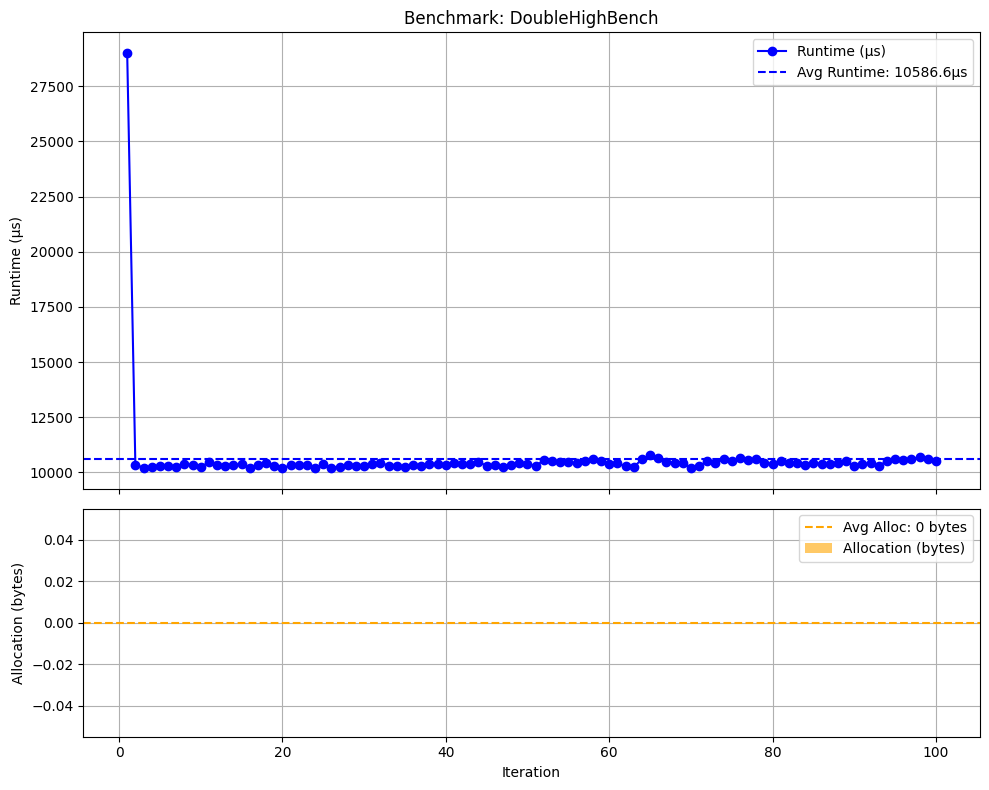

Benchmark: DoubleSqrtBench, Runs: 100, Runtimes: [1225, 1250, 1109, 1235, 1167, 1127, 1125, 1137, 1175, 1152, 1141, 1125, 1106, 1154, 1166, 1131, 1190, 1156, 1130, 1110, 1125, 1118, 1341, 1142, 1143, 1153, 1307, 1154, 1116, 1154, 1113, 1145, 1114, 1114, 1123, 1134, 1134, 1148, 1139, 1154, 1130, 1131, 1114, 1147, 1150, 1128, 1128, 1133, 1133, 1137, 1150, 1111, 1137, 1140, 1105, 1121, 1123, 1140, 1156, 1157, 1104, 1192, 1134, 1149, 1140, 1139, 1128, 1115, 1183, 1117, 1153, 1115, 1114, 1331, 1118, 1119, 1140, 1111, 1118, 1107, 1109, 1193, 1135, 1128, 1122, 1153, 1147, 1118, 1158, 1118, 1114, 1117, 1130, 1134, 1142, 1117, 1140, 1123, 1123, 1132], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


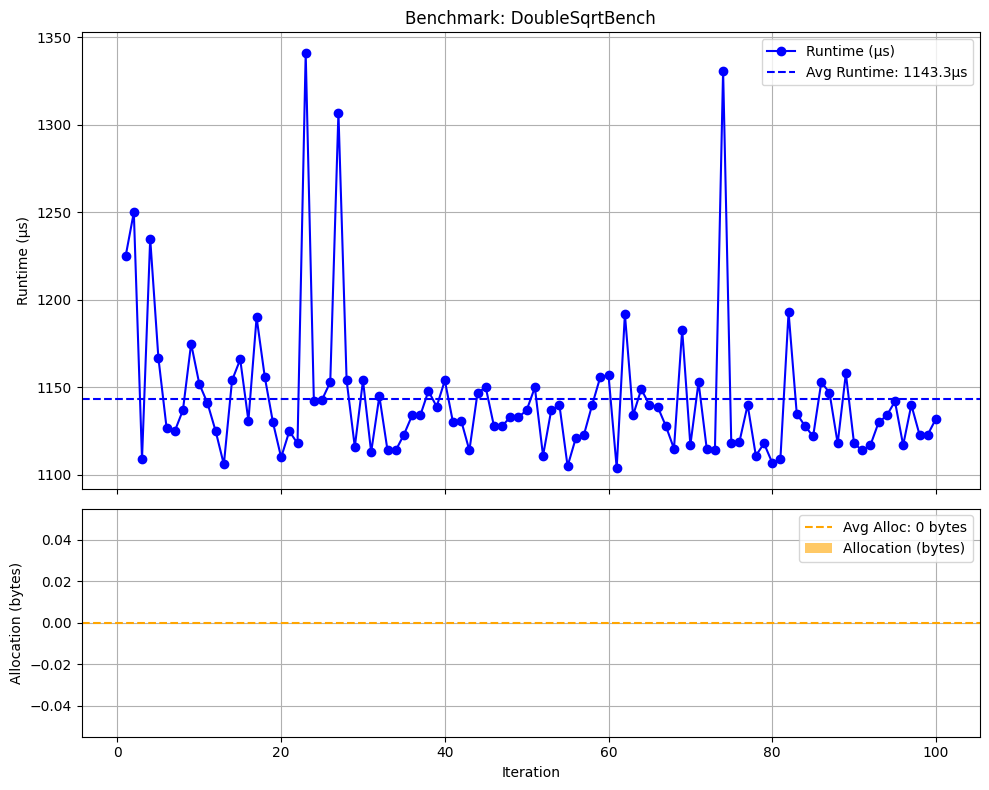

Benchmark: DoubleLExpBench, Runs: 100, Runtimes: [39, 41, 36, 31, 31, 41, 31, 43, 31, 37, 31, 30, 34, 31, 31, 32, 43, 31, 35, 31, 34, 30, 36, 31, 30, 31, 36, 35, 30, 31, 30, 32, 31, 30, 31, 37, 30, 30, 32, 30, 31, 31, 34, 30, 31, 31, 31, 30, 31, 30, 31, 30, 30, 32, 30, 32, 31, 36, 36, 35, 32, 30, 30, 30, 60, 30, 33, 30, 37, 31, 31, 30, 36, 32, 30, 38, 30, 31, 39, 31, 36, 34, 38, 31, 43, 32, 45, 31, 32, 31, 31, 31, 30, 30, 31, 31, 30, 31, 31, 30], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


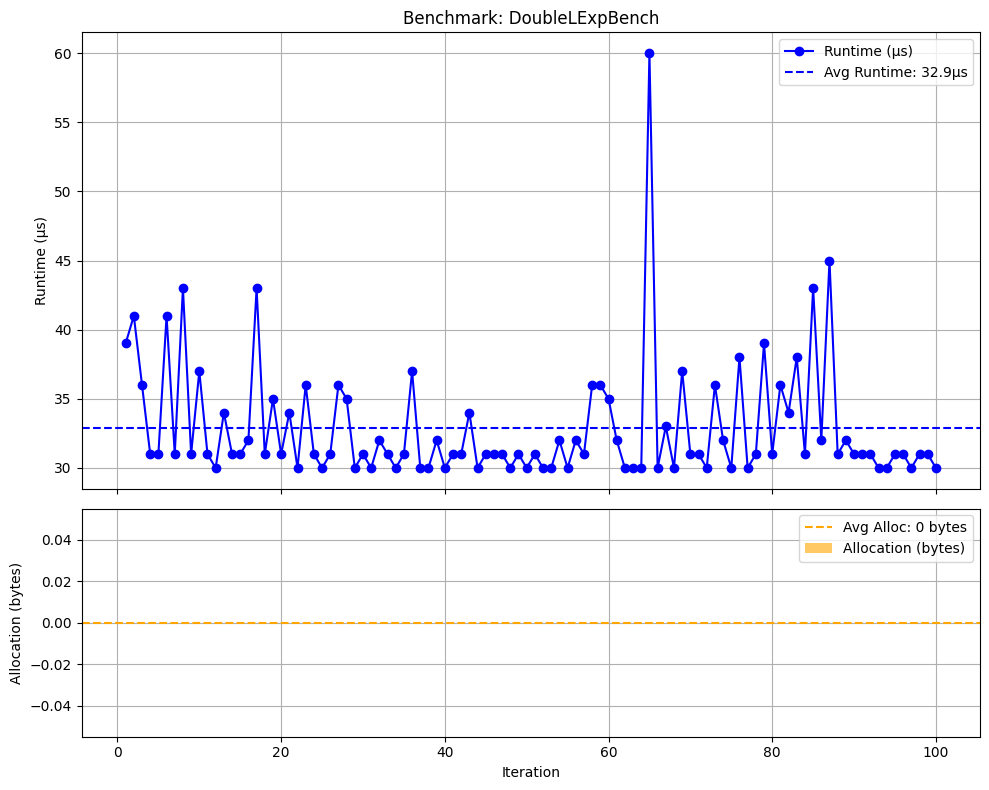

Benchmark: IntegerBench, Runs: 100, Runtimes: [4, 3, 3, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 3, 2, 4, 2, 3, 2, 2, 2, 4, 2, 4, 2, 5, 3, 3, 2, 4, 2, 4, 3, 3, 3, 3, 3, 2, 2, 3, 4, 2, 2, 4, 2, 3, 2, 2, 2, 4, 4, 2, 3, 2, 4, 2, 2, 2, 3, 3, 4, 4, 3, 3, 3, 2, 2, 2, 4, 2, 3, 2, 2, 3, 2, 4, 2, 3, 3, 3, 3, 4, 3, 4, 2, 2, 2, 4, 3, 3, 2, 2, 4, 2, 4, 2], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


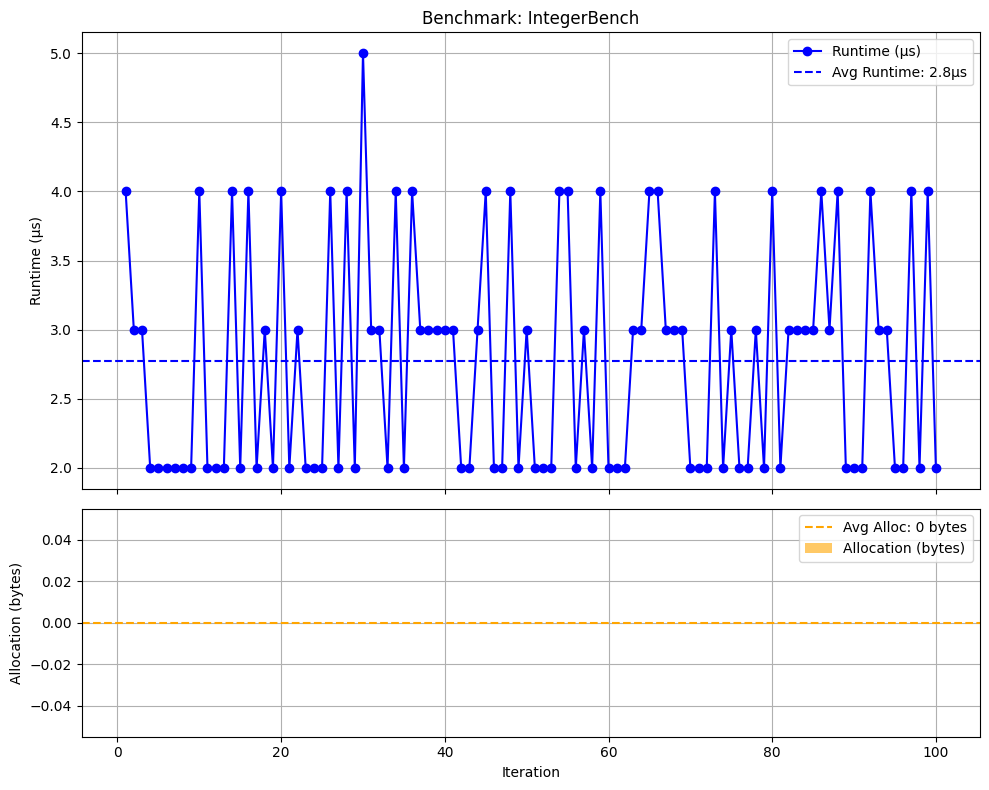

Benchmark: IntegerMedBench, Runs: 100, Runtimes: [22, 11, 10, 10, 11, 10, 10, 13, 10, 9, 10, 9, 9, 10, 10, 10, 10, 10, 14, 10, 9, 14, 15, 10, 10, 10, 16, 10, 9, 9, 10, 10, 10, 10, 10, 15, 14, 14, 10, 15, 9, 10, 10, 9, 10, 14, 9, 14, 11, 10, 9, 14, 10, 11, 9, 10, 13, 10, 14, 10, 16, 13, 28, 15, 14, 14, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 14, 10, 10, 10, 10, 9, 10, 10, 10, 11, 10, 9, 15, 12, 15, 11, 15, 14, 15, 14, 11, 11], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


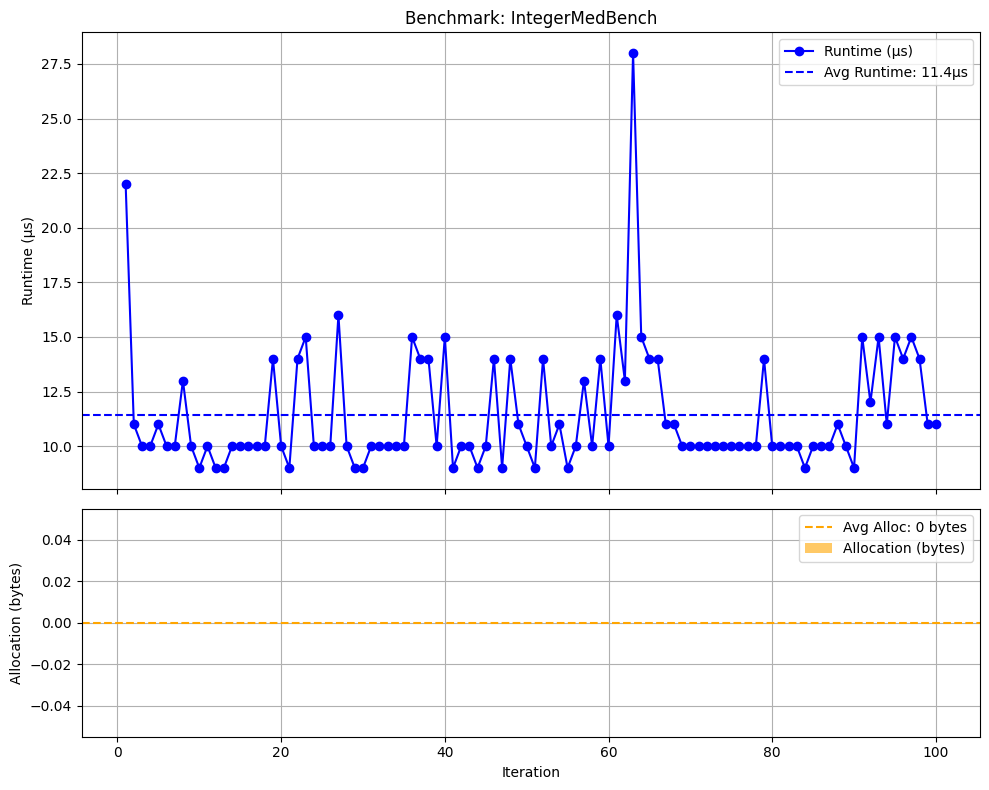

Benchmark: IntegerHighBench, Runs: 100, Runtimes: [73, 66, 66, 70, 64, 67, 67, 66, 66, 66, 67, 63, 77, 67, 63, 71, 69, 63, 68, 65, 72, 66, 64, 71, 67, 68, 67, 64, 71, 66, 76, 69, 66, 67, 66, 63, 67, 63, 72, 66, 70, 63, 68, 63, 74, 63, 72, 63, 69, 66, 69, 64, 68, 63, 66, 63, 72, 67, 69, 64, 67, 69, 69, 79, 64, 63, 67, 63, 63, 63, 69, 65, 69, 65, 66, 67, 66, 64, 64, 67, 75, 64, 76, 67, 69, 66, 72, 63, 63, 64, 67, 67, 68, 64, 67, 68, 63, 71, 65, 67], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


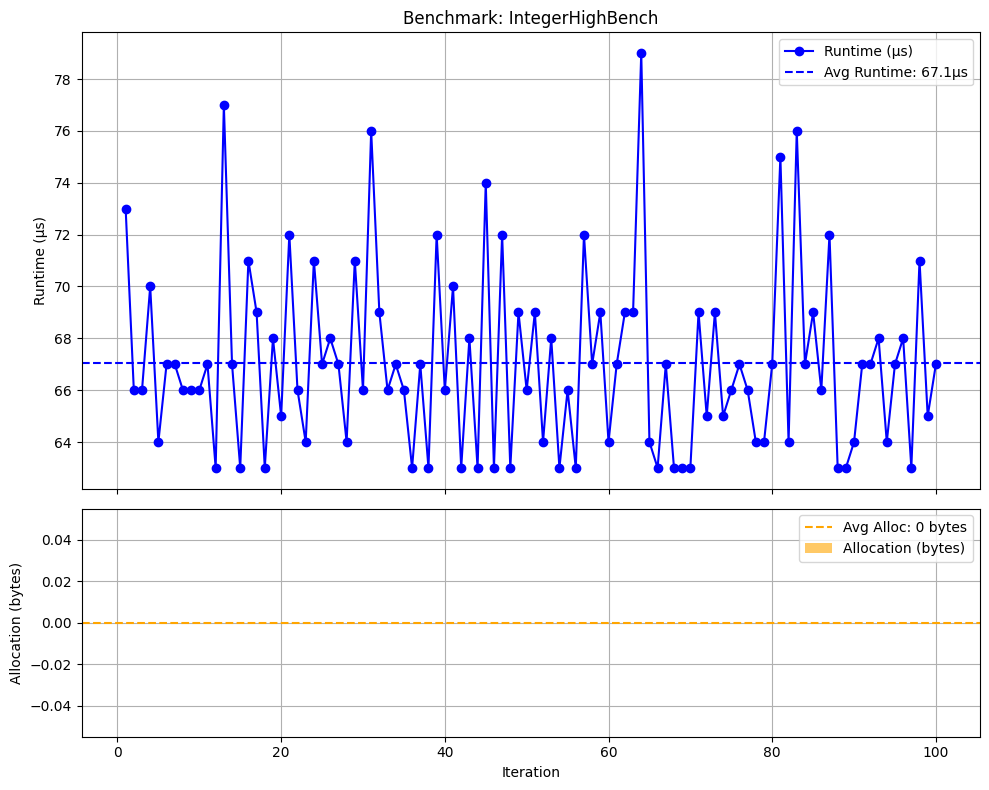

Benchmark: IntegerExpBench, Runs: 100, Runtimes: [51, 48, 51, 49, 56, 47, 49, 46, 49, 47, 46, 46, 47, 54, 47, 54, 55, 56, 50, 48, 46, 49, 49, 47, 52, 47, 47, 50, 51, 49, 55, 47, 50, 52, 51, 51, 50, 54, 52, 49, 50, 46, 47, 52, 48, 50, 50, 50, 51, 53, 47, 46, 49, 49, 47, 50, 47, 51, 48, 50, 50, 49, 46, 55, 47, 47, 51, 50, 52, 49, 53, 47, 50, 55, 51, 51, 50, 49, 62, 46, 50, 50, 51, 47, 47, 50, 46, 47, 46, 46, 60, 49, 53, 48, 49, 51, 51, 46, 50, 47], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


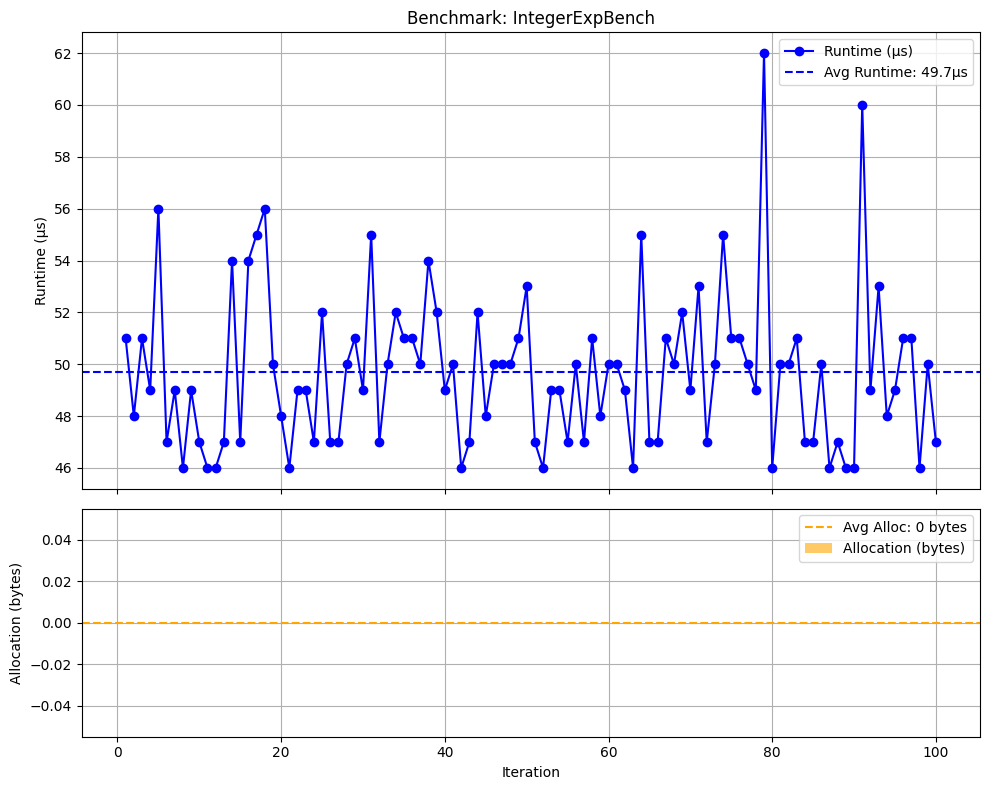

Benchmark: IntegerBigBench, Runs: 100, Runtimes: [811, 531, 538, 553, 617, 515, 557, 523, 523, 568, 588, 526, 521, 533, 540, 536, 523, 516, 534, 524, 496, 561, 532, 542, 593, 508, 507, 508, 525, 536, 532, 535, 567, 526, 539, 539, 516, 516, 517, 516, 524, 523, 540, 539, 532, 538, 532, 547, 529, 529, 515, 526, 516, 544, 511, 525, 621, 527, 532, 526, 517, 509, 563, 527, 538, 522, 527, 517, 530, 510, 547, 525, 540, 516, 520, 529, 529, 524, 540, 517, 533, 542, 522, 508, 529, 545, 534, 538, 525, 532, 527, 513, 529, 517, 538, 541, 514, 536, 537, 520], Allocations: [331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331

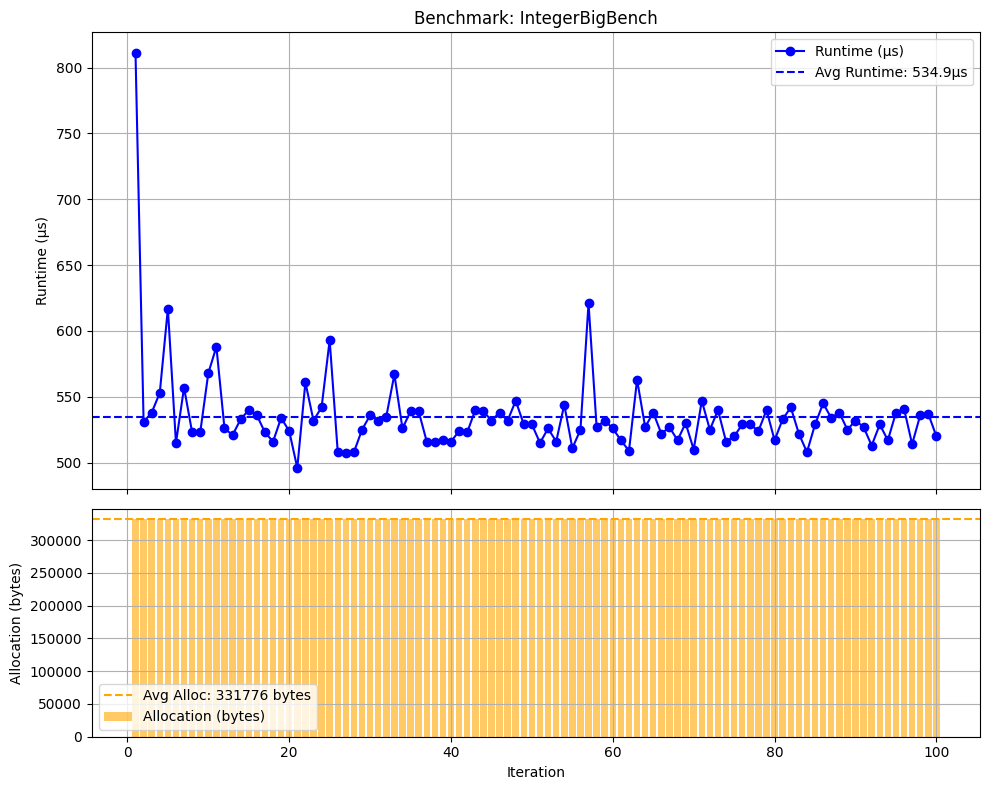

In [4]:
# General Configuration
BENCHMARKS = [
    "DoubleBench",
    "DoubleMedBench",
    "DoubleHighBench",
    "DoubleSqrtBench",
    "DoubleLExpBench",
    "IntegerBench",
    "IntegerMedBench",
    "IntegerHighBench",
    "IntegerExpBench",
    "IntegerBigBench"
]

runs = 100

for benchmark in BENCHMARKS:
    outcome = exec_bench(benchmark, runs)
    print(f"Benchmark: {benchmark}, Runs: {runs}, Runtimes: {outcome[0]}, Allocations: {outcome[1]}")
    plot_results(benchmark, outcome[0], outcome[1])